# Calculating the RDF atom-to-atom

We calculate the site-specific radial distribution functions of solvent around certain atoms.

**Last updated:** December 2022 with MDAnalysis 2.4.0-dev0

**Minimum version of MDAnalysis:** 0.19.0

**Packages required:**
    
* MDAnalysis (<a data-cite="michaud-agrawal_mdanalysis_2011" href="https://doi.org/10.1002/jcc.21787">Michaud-Agrawal *et al.*, 2011</a>, <a data-cite="gowers_mdanalysis_2016" href="https://doi.org/10.25080/Majora-629e541a-00e">Gowers *et al.*, 2016</a>)
* MDAnalysisTests

**Optional packages for visualisation:**

* [matplotlib](https://matplotlib.org)


In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [2]:
u = mda.Universe(TPR, XTC)

## Calculating the site-specific radial distribution function

A radial distribution function $g_{ab}(r)$ describes the time-averaged density of particles in $b$ from the reference group $a$ at distance $r$. It is normalised so that it becomes 1 for large separations in a homogenous system. See [the tutorial on averaged RDFs](average_rdf.ipynb) for more information. The `InterRDF_s` class ([API docs](https://docs.mdanalysis.org/stable/documentation_pages/analysis/rdf.html#MDAnalysis.analysis.rdf.InterRDF_s)) allows you to compute RDFs on an atom-to-atom basis, rather than simply giving the averaged RDF as in `InterRDF`.

Below, I calculate the RDF between selected alpha-carbons and the water atoms within 15 angstroms of CA60, *in the first frame of the trajectory*. The water group does not update over the trajectory as the water moves towards and away from the alpha-carbon. 

The RDF is limited to a spherical shell around each atom by `range`. Note that the range is defined around *each atom*, rather than the center-of-mass of the entire group.

If `density=True`, the final RDF is over the average density of the selected atoms in the trajectory box, making it comparable to the output of `rdf.InterRDF`. If `density=False`, the density is not taken into account. This can make it difficult to compare RDFs between AtomGroups that contain different numbers of atoms.

In [3]:
ca60 = u.select_atoms('resid 61 and name CA')
ca61 = u.select_atoms('resid 62 and name CA')
ca62 = u.select_atoms('resid 63 and name CA')
water = u.select_atoms('resname SOL and sphzone 15 group sel_a', sel_a=ca60)

ags = [[ca60+ca61, water], [ca62, water]]

ss_rdf = rdf.InterRDF_s(u, ags,
                    nbins=75,  # default
                    range=(0.0, 15.0),  # distance
                    norm='density',
                   )
ss_rdf.run()

/home/pbarletta/mambaforge/envs/guide/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:531: DeprecationWarning: The `u` attribute is superflous and will be removed in MDAnalysis 3.0.0.
  warnings.warn("The `u` attribute is superflous and will be removed "


Like `rdf.InterRDF`, the distance bins are available at `ss_rdf.bins`.

In [4]:
ss_rdf.results.bins

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9])

`ss_rdf.rdf` contains the atom-pairwise RDF for each of your pairs of AtomGroups. It is a list with the same length as your list of pairs `ags`. A result array has the shape `(len(ag1), len(ag2), nbins)` for the AtomGroup pair `(ag1, ag2)`. 

In [5]:
print('There are {} water atoms'.format(len(water)))
print('The first result array has shape: {}'.format(ss_rdf.results.rdf[0].shape))
print('The second result array has shape: {}'.format(ss_rdf.results.rdf[1].shape))

There are 1041 water atoms
The first result array has shape: (2, 1041, 75)
The second result array has shape: (1, 1041, 75)


Index the results array to get the RDF for a particular pair of atoms. `ss_rdf.rdf[i][j][k]` will return the RDF between atoms $j$ and $k$ in the $i$-th pair of atom groups. For example, below we get the RDF between the alpha-carbon in residue 61 (i.e. the second atom of the first atom group) and the 571st atom of water.

In [6]:
ca61_h2o_571 = ss_rdf.results.rdf[0][1][570]
ca61_h2o_571

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0023665 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00114292,
       0.00106921, 0.        , 0.00094167, 0.        , 0.        ,
       0.        , 0.0007466 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00055068, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0003116 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00025464, 0.00024669, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Text(0.5, 1.0, 'RDF between CA61 and MW6365')

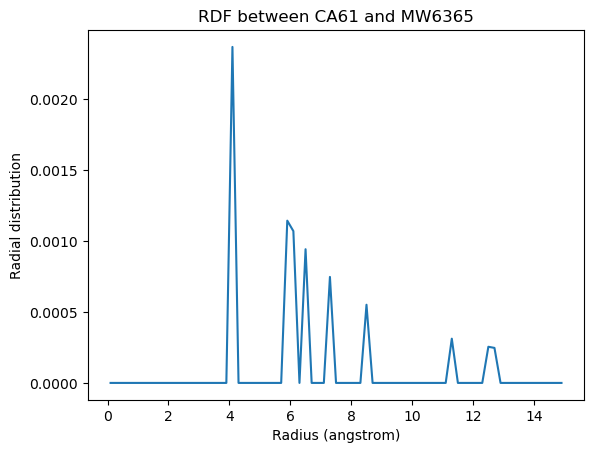

In [7]:
plt.plot(ss_rdf.results.bins, ca61_h2o_571)
w570 = water[570]
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('RDF between CA61 and {}{}'.format(w570.name, w570.resid))

If you are having trouble finding pairs of atoms where the results are not simply 0, you can use Numpy functions to find the indices of the nonzero values. Below we count the nonzero entries in the first `rdf` array.

In [8]:
j, k, nbin = np.nonzero(ss_rdf.results.rdf[0])
print(len(j), len(k), len(nbin))

4374 4374 4374


Each triplet of `[j, k, nbin]` indices is a nonzero value, corresponding to the `nbin`th bin between atoms $j$ and $k$. For example:

In [9]:
print(f"{ss_rdf.results.rdf[0][j[0], k[0], nbin[0]]: .5f}")

 0.00028


Right now, we don't care which particular bin has a nonzero value. Let's find which water atom is the most present around the alpha-carbon of residue 60, i.e. the first atom.

In [10]:
# where j == 0, representing the first atom
water_for_ca60 = k[j==0]
# count how many of each atom index are in array
k_values, k_counts = np.unique(water_for_ca60, 
                               return_counts=True)
# get the first k value with the most counts
k_max = k_values[np.argmax(k_counts)]
print('The water atom with the highest distribution '
      'around CA60 has index {}'.format(k_max))

The water atom with the highest distribution around CA60 has index 568


You can also calculate a cumulative distribution function for each of your results with `ss_rdf.get_cdf()`. This is the actual count of atoms within the given range, averaged over the trajectory; the volume of each radial shell is not taken into account. The result then gets saved into `ss_rdf.cdf`. The CDF has the same shape as the corresponding RDF array.

In [11]:
cdf = ss_rdf.get_cdf()
print(cdf[0].shape)

(2, 1041, 75)


Text(0.5, 1.0, 'RDF between CA60 and HW16365')

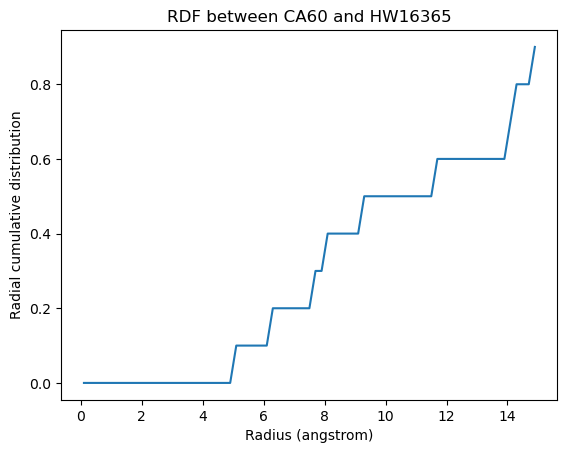

In [12]:
plt.plot(ss_rdf.results.bins, ss_rdf.results.cdf[0][0][568])
w568 = water[568]
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')
plt.title('RDF between CA60 and {}{}'.format(w568.name, w568.resid))

## The site-specific RDF without densities

When the `density` of the selected atom groups over the box volume is not accounted for, your distribution values will be proportionally lower.

In [13]:
ss_rdf_nodensity = rdf.InterRDF_s(u, ags,
                    nbins=75,  # default
                    range=(0.0, 15.0),  # distance
                    density=False,
                   )
ss_rdf_nodensity.run()
ss_rdf_nodensity.get_cdf()

[array([[[0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         ...,
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1]],
 
        [[0. , 0. , 0. , ..., 0. , 0.1, 0.1],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         ...,
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1]]]),
 array([[[0. , 0. , 0. , ..., 0. , 0.1, 0.1],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0.1, 0.1, 0.1],
         ...,
         [0. , 0. , 0. , ..., 0. , 0. , 0.1],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ],
         [0. , 0. , 0. , ..., 0. , 0. , 0. ]]])]

Text(0.5, 1.0, 'RDF between CA61 and MW6365')

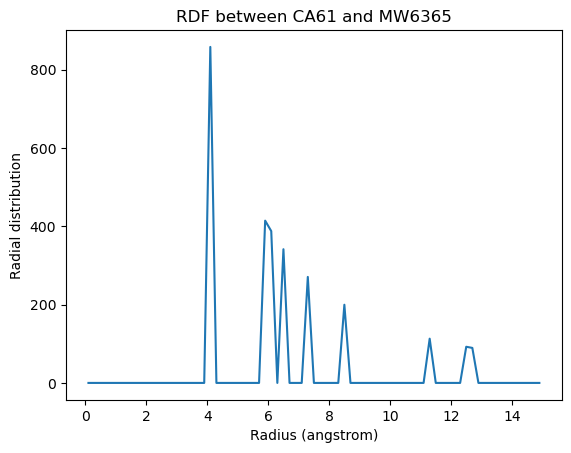

In [14]:
plt.plot(ss_rdf_nodensity.results.bins, 
         ss_rdf_nodensity.results.rdf[0][1][570])
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('RDF between CA61 and {}{}'.format(w570.name, w570.resid))

## References

[1] Oliver Beckstein, Elizabeth&nbsp;J. Denning, Juan&nbsp;R. Perilla, and Thomas&nbsp;B. Woolf.
Zipping and <span class="bibtex-protected">Unzipping</span> of <span class="bibtex-protected">Adenylate</span> <span class="bibtex-protected">Kinase</span>: <span class="bibtex-protected">Atomistic</span> <span class="bibtex-protected">Insights</span> into the <span class="bibtex-protected">Ensemble</span> of <span class="bibtex-protected">Open</span>↔<span class="bibtex-protected">Closed</span> <span class="bibtex-protected">Transitions</span>.
<em>Journal of Molecular Biology</em>, 394(1):160–176, November 2009.
00107.
URL: <a href="https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164">https://linkinghub.elsevier.com/retrieve/pii/S0022283609011164</a>, <a href="https://doi.org/10.1016/j.jmb.2009.09.009">doi:10.1016/j.jmb.2009.09.009</a>.

[2] Richard&nbsp;J. Gowers, Max Linke, Jonathan Barnoud, Tyler J.&nbsp;E. Reddy, Manuel&nbsp;N. Melo, Sean&nbsp;L. Seyler, Jan Domański, David&nbsp;L. Dotson, Sébastien Buchoux, Ian&nbsp;M. Kenney, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> <span class="bibtex-protected">Python</span> <span class="bibtex-protected">Package</span> for the <span class="bibtex-protected">Rapid</span> <span class="bibtex-protected">Analysis</span> of <span class="bibtex-protected">Molecular</span> <span class="bibtex-protected">Dynamics</span> <span class="bibtex-protected">Simulations</span>.
<em>Proceedings of the 15th Python in Science Conference</em>, pages 98–105, 2016.
00152.
URL: <a href="https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html">https://conference.scipy.org/proceedings/scipy2016/oliver_beckstein.html</a>, <a href="https://doi.org/10.25080/Majora-629e541a-00e">doi:10.25080/Majora-629e541a-00e</a>.

[3] Naveen Michaud-Agrawal, Elizabeth&nbsp;J. Denning, Thomas&nbsp;B. Woolf, and Oliver Beckstein.
<span class="bibtex-protected">MDAnalysis</span>: <span class="bibtex-protected">A</span> toolkit for the analysis of molecular dynamics simulations.
<em>Journal of Computational Chemistry</em>, 32(10):2319–2327, July 2011.
00778.
URL: <a href="http://doi.wiley.com/10.1002/jcc.21787">http://doi.wiley.com/10.1002/jcc.21787</a>, <a href="https://doi.org/10.1002/jcc.21787">doi:10.1002/jcc.21787</a>.